In [1]:
import scTDA
import pandas as pd
import matplotlib
matplotlib.rcParams['patch.force_edgecolor'] = True
matplotlib.rcParams['patch.facecolor'] = 'b'
%matplotlib inline

In [2]:
index = pd.read_table('scTDA.GBM9.index.txt', header=None)
files = index.iloc[:,0].values.tolist()
cells = index.iloc[:,1].values.tolist()
libs = index.iloc[:,2].values.tolist()
days = index.iloc[:,3].values.tolist()

In [3]:
p = scTDA.Preprocess(files, days, libs, cells, spike='_null_')

Minimum number of transcripts per cell: 116236
Minimum cell complexity: 3551


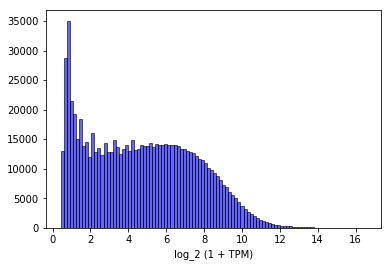

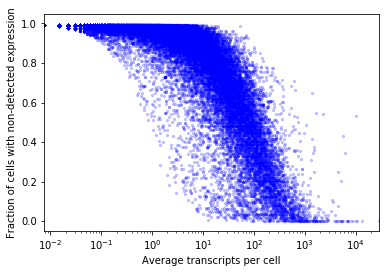

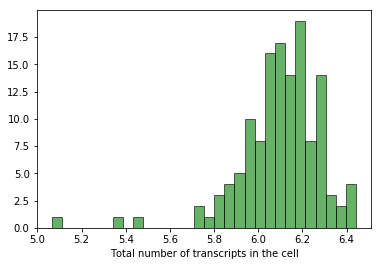

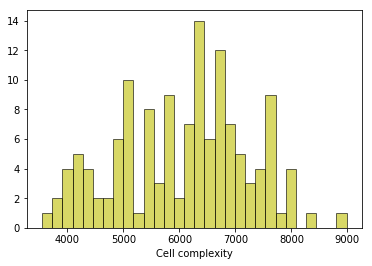

In [4]:
p.show_statistics()

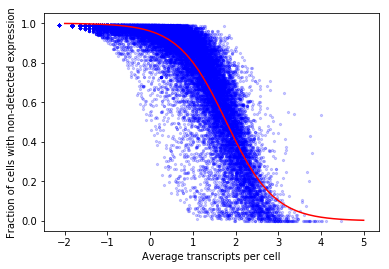

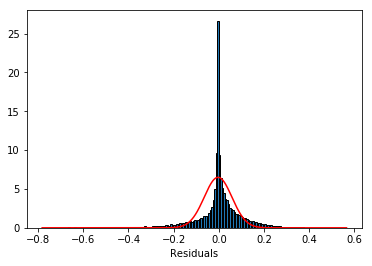

In [5]:
p.fit_sigmoid()

1226 genes were selected


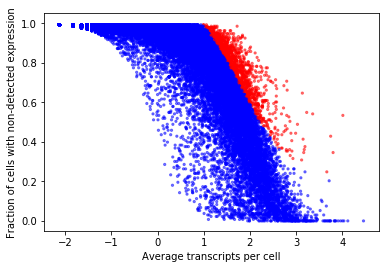

In [6]:
p.select_genes(avg_counts=2.0, min_z=3.0)

In [7]:
print list(p.genes[p.which_genes])

['ABCA8', 'ABCG1', 'ABHD10', 'ABHD4', 'ABHD6', 'AC000068.5', 'AC005682.5', 'AC006042.8', 'AC006978.6', 'AC009404.2', 'AC011243.1', 'AC018647.3', 'AC023271.1', 'AC025335.1', 'AC034220.3', 'AC046143.6', 'AC062029.1', 'AC068282.3', 'AC096775.2', 'AC123886.2', 'AC140076.1', 'ACRC', 'ACVR2B', 'ADAM1A', 'ADAM28', 'ADAMDEC1', 'ADAMTS18', 'ADAMTS2', 'ADAMTS4', 'ADAMTS9-AS1', 'ADAT2', 'ADCY10P1', 'ADCY5', 'ADCY9', 'ADCYAP1R1', 'ADD2', 'ADORA2B', 'ADPGK', 'AF127936.7', 'AF131215.3', 'AF131215.4', 'AF131216.6', 'AGFG2', 'AGPAT9', 'AGT', 'AGTPBP1', 'AHNAK2', 'AIF1L', 'AIM1', 'AIM2', 'AJAP1', 'AKAP7', 'AKTIP', 'AL357673.1', 'AL365202.1', 'AL590452.1', 'AL592494.5', 'AL672296.1', 'ALDH5A1', 'ALDH6A1', 'ALDOC', 'ALOX5AP', 'ALPK2', 'AMER2', 'AMMECR1', 'ANK3', 'ANKH', 'ANKS1B', 'ANO5', 'ANTXR2', 'ANXA11', 'AP001372.2', 'AP4B1', 'AQP4', 'ARHGAP18', 'ARHGAP24', 'ARHGEF18', 'ARHGEF4', 'ARRDC2', 'ARRDC4', 'ARSG', 'ASB15', 'ASF1B', 'ASPA', 'ASPM', 'ATAD1', 'ATP1A2', 'ATP6V1G2', 'ATP7A', 'ATP8A1', 'ATRIP', '

In [8]:
p.save('scTDA.GBM9.output_step1')

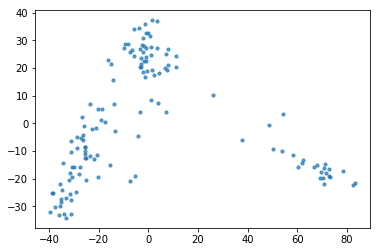

total of 252 patches required clustering
this implies 421 nodes in the mapper graph


In [9]:
t = scTDA.TopologicalRepresentation('scTDA.GBM9.output_step1', lens='pca', metric='euclidean')
t.save('scTDA.GBM9.output_step2_pca', 25, 0.40);

In [10]:
c = scTDA.UnrootedGraph('scTDA.GBM9.output_step2_pca', 'scTDA.GBM9.output_step1.no_subsampling.tsv', groups=False)

In [11]:
c = scTDA.RootedGraph('scTDA.GBM9.output_step2_pca', 'scTDA.GBM9.output_step1.no_subsampling.tsv', posgl=True, groups=True)

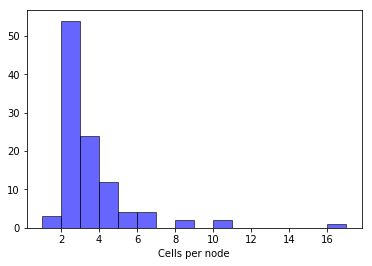

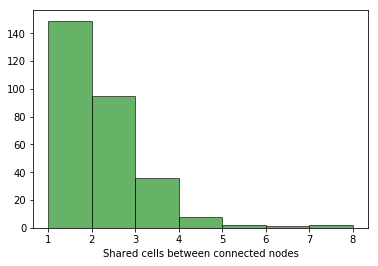

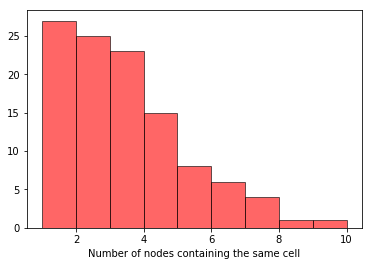

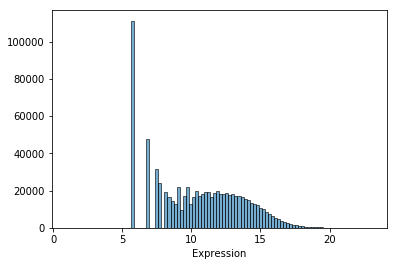

In [12]:
c.show_statistics()

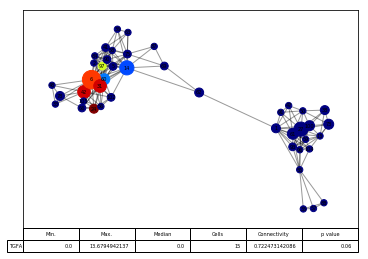

In [13]:
c.draw('TGFA', weight=20, table=True, labels=True, save='TGFA.png');

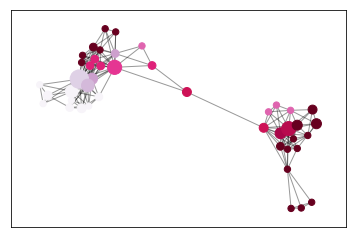

In [14]:
c.draw('lib_GBM9_S1', weight=20, ccmap='PuRd');

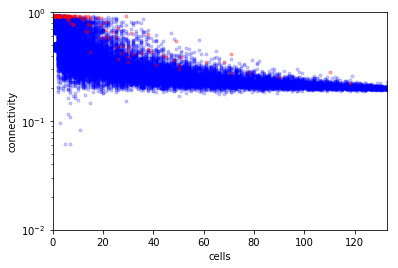

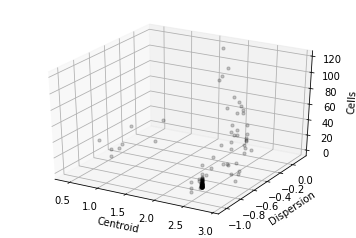

In [15]:
c.save()

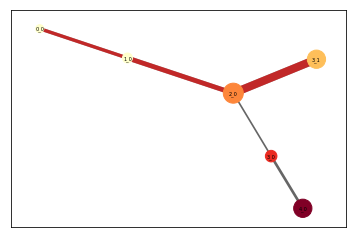

In [16]:
c.draw_skeleton('timepoint', labels=True, ccmap='YlOrRd', markpath=True);